# Z Method
[source](https://www.youtube.com/watch?v=OnPE-Z8jtqM&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=42)
![ytss](assets/Z_method.png)  
pretty much self explanatory :

you have to be sure that the column you are checking is normally distributed or almost.
if value is out of mean+3std or mean-3std range then its outlier. 

## Code

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('assets/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


lets check if the data is normally distributed or not

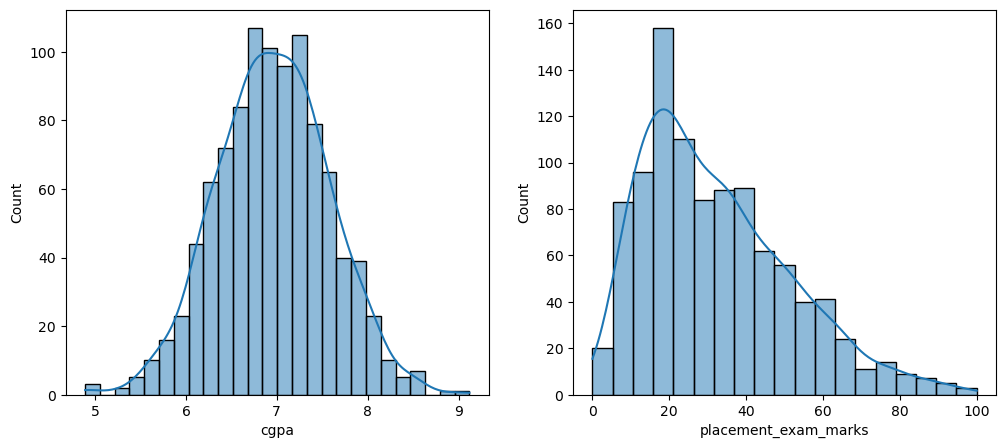

In [5]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

cgpa is almost perfectly normally distributed, while placement_exam_marks are a little right skewed

In [6]:
print("cgpa mean: ",df['cgpa'].mean(),"\ncgpa max: ",df['cgpa'].max(),"\ncgpa min",df['cgpa'].min(),"\ncgpa std: ",df['cgpa'].std())

cgpa mean:  6.96124 
cgpa max:  9.12 
cgpa min 4.89 
cgpa std:  0.6158978751323894


### Trimming

In [7]:
# boundary values according to Z-score
print('upper boundary: ',df['cgpa'].mean() + 3*df['cgpa'].std(),"\nlower boundar: ",df['cgpa'].mean() - 3*df['cgpa'].std())

upper boundary:  8.808933625397168 
lower boundar:  5.113546374602832


In [8]:
# having this we can find out the outliers in cgpa easily
df[(df['cgpa'] > 8.808) | (df['cgpa'] < 5.113)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [ ]:
# Trimming
#`just remove em

new_df = df[(df['cgpa'] <8.808) & (df['cgpa'] > 5.113)]
new_df.shape,df.shape

## Approach 2
Using Z-Score

In [10]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std() # its in the range of -3,+3... everything outta this range is outlier
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [14]:
# so we check how many are outta that range
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)] #these are the same outlier we got with the previous method.

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [16]:
# Trimming
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df.shape

(995, 4)

### Capping
Replace all the outliers with upper limit and lower limit.

In [18]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [22]:
upper_limit

np.float64(8.808933625397168)

In [19]:
df['cgpa'] = np.where((df['cgpa']>upper_limit),upper_limit,df['cgpa'])

In [20]:
df['cgpa'] = np.where(df['cgpa']<lower_limit,lower_limit,df['cgpa'])

In [24]:
df[(df['cgpa'] > upper_limit) | (df['cgpa'] < lower_limit)] # no outliers now

,cgpa,placement_exam_marks,placed,cgpa_zscore


In [25]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64